## **Libraries**

In [1]:
#Basic libraries
import numpy as np
import pandas as pd

#Visualization library
import matplotlib.pyplot as plt

##MNIST Dataset from sklearn
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.activations import relu
from keras.optimizers import adam_v2
from keras.metrics import categorical_crossentropy

##Ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

## **Dataset**

In [2]:
dataset = fetch_openml("mnist_784")

MNIST_data = dataset.frame

In [3]:
MNIST_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


## **Splitting the Dataset**

In [4]:
X = MNIST_data.iloc[:, 0:784]
y = MNIST_data['class']

X_train, X_test, y_train_sample, y_test_sample = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Resetting Index
X_train, X_test = X_train.reset_index(drop = True), X_test.reset_index(drop = True)
y_train_sample, y_test_sample = y_train_sample.reset_index(drop = True), y_test_sample.reset_index(drop = True)


X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = keras.utils.to_categorical(y_train_sample, 10)
y_test = keras.utils.to_categorical(y_test_sample, 10)

In [5]:
print (f"The number of rows in training set is {X_train.shape[0]}")
print (f"The number of rows in test set is {X_test.shape[0]}")

The number of rows in training set is 56000
The number of rows in test set is 14000


## **Visualizing the target category**

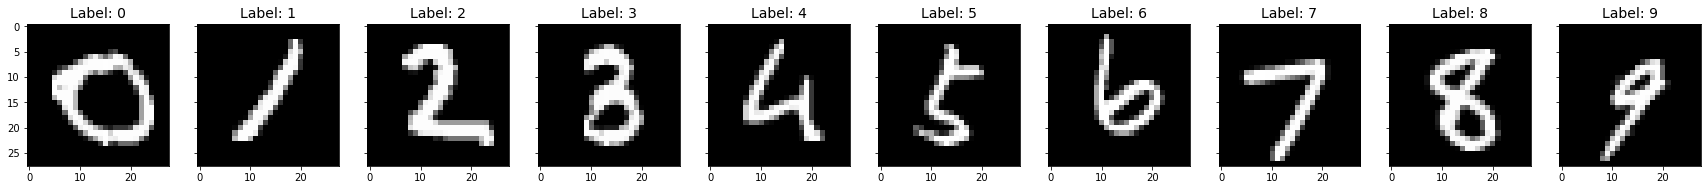

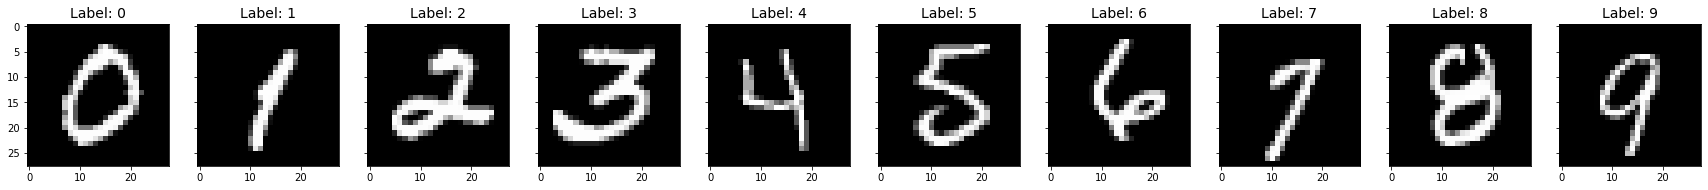

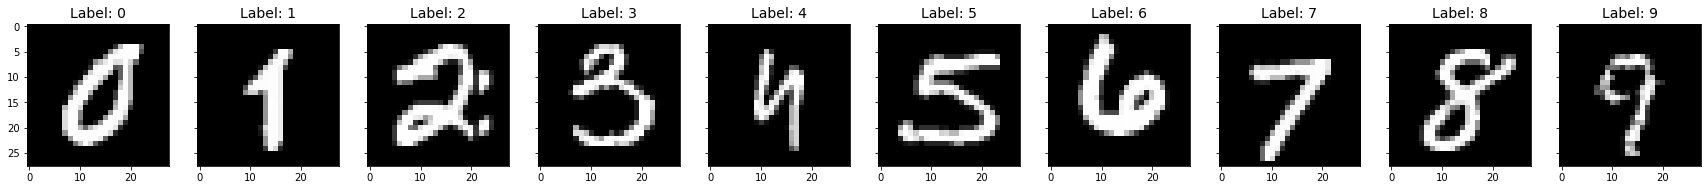

In [6]:
num_classes = 10 

for j in range(0,3):
  fig, axes = plt.subplots(1, num_classes, figsize = (30,20), sharey = True)
  index = np.random.randint(0, 1000) ## Creating a random index between 0 and 1000
  for i in range(0, num_classes):
    sample = X_train[y_train_sample == str(i)].iloc[index].values.reshape(28,28)#Reshaping the rows int0 28 x 28 matrix, to see what the images look like
    axes[i].imshow(sample, cmap = 'gray')
    axes[i].set_title(f"Label: {i}", fontsize = 14)

## **Artificial Neural Network**

In [7]:
model = Sequential()

model.add(Dense(128, input_shape = (784, ), activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
              adam_v2.Adam(learning_rate = 0.001), 
              loss = "categorical_crossentropy", 
              metrics = ["accuracy"]
              )

In [10]:
model.fit(
    x= X_train,
    y= y_train,
    batch_size= 900,
    epochs= 50,
    verbose= 2,
    validation_split=0.2,
    shuffle = True
)

Epoch 1/50
50/50 - 1s - loss: 0.9919 - accuracy: 0.7048 - val_loss: 0.3555 - val_accuracy: 0.8979 - 1s/epoch - 29ms/step
Epoch 2/50
50/50 - 0s - loss: 0.3522 - accuracy: 0.8954 - val_loss: 0.2522 - val_accuracy: 0.9268 - 324ms/epoch - 6ms/step
Epoch 3/50
50/50 - 0s - loss: 0.2643 - accuracy: 0.9224 - val_loss: 0.2024 - val_accuracy: 0.9412 - 344ms/epoch - 7ms/step
Epoch 4/50
50/50 - 0s - loss: 0.2200 - accuracy: 0.9348 - val_loss: 0.1773 - val_accuracy: 0.9487 - 319ms/epoch - 6ms/step
Epoch 5/50
50/50 - 0s - loss: 0.1890 - accuracy: 0.9437 - val_loss: 0.1579 - val_accuracy: 0.9529 - 338ms/epoch - 7ms/step
Epoch 6/50
50/50 - 0s - loss: 0.1678 - accuracy: 0.9500 - val_loss: 0.1436 - val_accuracy: 0.9574 - 355ms/epoch - 7ms/step
Epoch 7/50
50/50 - 0s - loss: 0.1483 - accuracy: 0.9555 - val_loss: 0.1294 - val_accuracy: 0.9625 - 320ms/epoch - 6ms/step
Epoch 8/50
50/50 - 0s - loss: 0.1323 - accuracy: 0.9600 - val_loss: 0.1229 - val_accuracy: 0.9649 - 308ms/epoch - 6ms/step
Epoch 9/50
50/50 -

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss : {test_loss}, Test Accuracy : {test_accuracy}")

438/438 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9761
Test Loss : 0.09601479023694992, Test Accuracy : 0.9760714173316956


In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1).astype(str)

In [13]:
accuracy_score(y_test_sample, y_pred_classes.astype(str))

0.9760714285714286

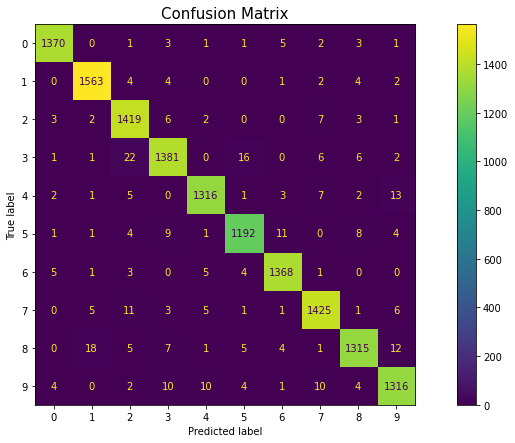

In [14]:
labels = [f"{x}" for x in range(10)]
cm = confusion_matrix(y_test_sample, y_pred_classes, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

## **Error Analysis**

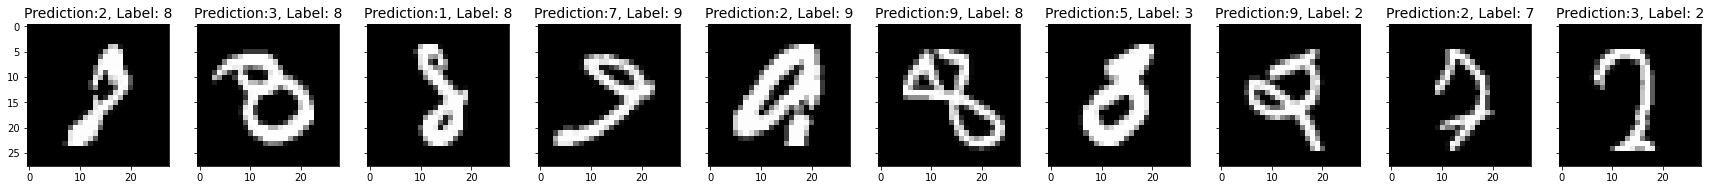

In [15]:
y_misclassified = []
for i in range(len(y_test_sample)):
  if y_pred_classes[i] != y_test_sample[i]:
    y_misclassified.append(i)

fig, axes = plt.subplots(1, 10, figsize = (30,20), sharey = True)

for i, index in enumerate(y_misclassified[:10]):
  sample = X_test.iloc[index].values.reshape(28,28)#Reshaping the rows int0 28 x 28 matrix, to see what the images look like
  axes[i].imshow(sample, cmap = 'gray')
  axes[i].set_title(f"Prediction:{y_pred_classes[index]}, Label: {y_test_sample[index]}", fontsize = 14)